In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
#open the file - delete file later
azdias = pd.read_csv("azdias_null.csv.zip",compression='gzip')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
azdias.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,1,910220,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,2,910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,3,910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,4,910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [4]:
print(azdias.shape)

(891221, 367)


In [5]:
#change the unamed column name to  delete 
azdias.rename(columns={'Unnamed: 0': "delete"}, inplace= True)

In [6]:
#drop columns which have more than 50% missing values from azdias and customers
drop_azdias = ['delete', 'AGER_TYP', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'EXTSEL992', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'TITEL_KZ']
azdias.drop(columns= drop_azdias, inplace=True)

In [7]:
print(azdias.shape)

(891221, 357)


In [24]:
# list = azdias.isnull().sum().sort_values(ascending=False).nlargest(270)
# azdias['CAMEO_INTL_2015_2'] = pd.to_numeric(azdias['CAMEO_INTL_2015'], errors = 'coerce', downcast ='float')

In [27]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 357 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(264), int64(87), object(6)
memory usage: 2.4+ GB


In [86]:
#get the list of column names with dtype as object
obj_list = azdias.select_dtypes(include='object').columns
obj_list

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ',
       'CAMEO_DEU_2015_2', 'CAMEO_DEUG_2015_2', 'CAMEO_INTL_2015_2'],
      dtype='object')

In [87]:
#convert object dtype columns to ints dtype

def convertobjects(dataset):
    dataset['CAMEO_DEU_2015_2'] = dataset['CAMEO_DEU_2015'].astype(str).str[0]   #get the first element of the string
    dataset['CAMEO_DEUG_2015_2']= dataset['CAMEO_DEUG_2015'].astype(str).str[0]
    dataset['CAMEO_INTL_2015_2'] = dataset['CAMEO_INTL_2015'].astype(str).str[0]
    
    CAMEI_dict = {"1": 1, "2": 2, "3": 3, "4": 4, "5":5, "6":6, "7":7, "8": 8, "9":9}   #convert to int dtype
    dataset['CAMEO_DEU_2015_2']= dataset['CAMEO_DEU_2015_2'].map(CAMEI_dict)
    dataset['CAMEO_DEUG_2015_2']= dataset['CAMEO_DEUG_2015_2'].map(CAMEI_dict)
    dataset['CAMEO_INTL_2015_2']= dataset['CAMEO_INTL_2015_2'].map(CAMEI_dict)
    
    dataset['OST_WEST_KZ']= dataset['OST_WEST_KZ'].map({"W":1 , "O":0})
    
    
    

In [88]:
convertobjects(azdias)

In [94]:
#drop the object dtype columns
object_dtype_drop = ['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM']
azdias.drop(columns= object_dtype_drop, inplace=True)

In [95]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 355 entries, LNR to CAMEO_INTL_2015_2
dtypes: float64(268), int64(87)
memory usage: 2.4 GB


In [117]:
#get the columns with respective unique data groups
big_cat_columns = []
for columns in azdias.columns:
    groups = azdias[columns].nunique()
    print('{}  ----  {}'.format(columns, groups))
    if groups >15:
        big_cat_columns.append(columns)   #list of columns with more than 15 unique data. 
        

LNR  ----  891221
AKT_DAT_KL  ----  9
ALTER_HH  ----  21
ALTERSKATEGORIE_FEIN  ----  26
ANZ_HAUSHALTE_AKTIV  ----  292
ANZ_HH_TITEL  ----  21
ANZ_KINDER  ----  11
ANZ_PERSONEN  ----  30
ANZ_STATISTISCHE_HAUSHALTE  ----  268
ANZ_TITEL  ----  6
ARBEIT  ----  6
BALLRAUM  ----  7
CJT_GESAMTTYP  ----  6
CJT_KATALOGNUTZER  ----  5
CJT_TYP_1  ----  5
CJT_TYP_2  ----  5
CJT_TYP_3  ----  5
CJT_TYP_4  ----  5
CJT_TYP_5  ----  5
CJT_TYP_6  ----  5
D19_BANKEN_ANZ_12  ----  7
D19_BANKEN_ANZ_24  ----  7
D19_BANKEN_DATUM  ----  10
D19_BANKEN_DIREKT  ----  8
D19_BANKEN_GROSS  ----  7
D19_BANKEN_LOKAL  ----  8
D19_BANKEN_OFFLINE_DATUM  ----  10
D19_BANKEN_ONLINE_DATUM  ----  10
D19_BANKEN_ONLINE_QUOTE_12  ----  11
D19_BANKEN_REST  ----  8
D19_BEKLEIDUNG_GEH  ----  8
D19_BEKLEIDUNG_REST  ----  8
D19_BILDUNG  ----  8
D19_BIO_OEKO  ----  8
D19_BUCH_CD  ----  8
D19_DIGIT_SERV  ----  8
D19_DROGERIEARTIKEL  ----  8
D19_ENERGIE  ----  8
D19_FREIZEIT  ----  8
D19_GARTEN  ----  8
D19_GESAMT_ANZ_12  ----  7
D19_

In [150]:
# big_cat_columns.pop(0)
big_cat_columns

['ALTER_HH',
 'ALTERSKATEGORIE_FEIN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_PERSONEN',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'EINGEZOGENAM_HH_JAHR',
 'GEBURTSJAHR',
 'KBA13_ANZAHL_PKW',
 'LP_LEBENSPHASE_FEIN',
 'MIN_GEBAEUDEJAHR',
 'VERDICHTUNGSRAUM']

In [ ]:
ALTER_HH  ----  21  
ALTERSKATEGORIE_FEIN  ----  26
ANZ_HAUSHALTE_AKTIV  ----  292
ANZ_HH_TITEL  ----  21
ANZ_PERSONEN  ----  30
ANZ_STATISTISCHE_HAUSHALTE  ----  268
EINGEZOGENAM_HH_JAHR  ----  37
GEBURTSJAHR  ----  117
KBA13_ANZAHL_PKW  ----  1261
LP_LEBENSPHASE_FEIN  ----  41
MIN_GEBAEUDEJAHR  ----  32
VERDICHTUNGSRAUM  ----  46

In [ ]:
qcut_labels = [1,2,3,4,5,6,7,8,9,10]
a = pd.qcut(azdias['ALTER_HH'], q=10, labels = qcut_labels)
a = pd.qcut(azdias['ALTERSKATEGORIE_FEIN'], q=10, labels = qcut_labels)
a= pd.qcut(x= azdias['EINGEZOGENAM_HH_JAHR'], q=10, labels = qcut_labels)
a= pd.qcut(x= azdias['KBA13_ANZAHL_PKW'], q=10, labels = qcut_labels)



cut_labels = [0,1,2,3,4,5,6,7,8,9,10]
a= pd.cut(x= azdias['ANZ_HH_TITEL'], bins=[-1,0,1,2,3,4,5,6,7,8,9,23], labels = cut_labels)
a= pd.cut(x= azdias['ANZ_PERSONEN'], bins=[-1,0,1,2,3,4,5,6,7,8,9,46], labels = cut_labels)



# a= pd.qcut(x= azdias['LP_LEBENSPHASE_FEIN'], q=9, labels = qcut_labels) ------drop
# MIN_GEBAEUDEJAHR -------drop
# VERDICHTUNGSRAUM  -------drop

In [226]:
azdias['GEBURTSJAHR'].value_counts()

0       392318
1967     11183
1965     11090
1966     10933
1970     10883
         ...  
1909         7
1904         5
1907         4
1900         4
1902         1
Name: GEBURTSJAHR, Length: 117, dtype: int64

In [222]:
qcut_labels = [0,1,2,3,4,5,6,7,8,9,10]
a= pd.qcut(x= azdias['GEBURTSJAHR'], q=10, labels = qcut_labels)
# a = pd.qcut(azdias['ANZ_HH_TITEL'], q=10, labels = qcut_labels)

In [223]:
a.value_counts()

3     79500
1     79099
7     78955
5     78685
8     78552
10    78470
2     78149
9     78148
4     78020
6     77843
Name: KBA13_ANZAHL_PKW, dtype: int64

In [224]:
b = pd.qcut(x= azdias['KBA13_ANZAHL_PKW'], q=10)

In [225]:
b.value_counts()

(347.0, 417.0]      79500
(-0.001, 263.0]     79099
(623.0, 719.0]      78955
(482.0, 549.0]      78685
(719.0, 851.0]      78552
(1070.0, 2300.0]    78470
(263.0, 347.0]      78149
(851.0, 1070.0]     78148
(417.0, 482.0]      78020
(549.0, 623.0]      77843
Name: KBA13_ANZAHL_PKW, dtype: int64

In [183]:
azdias['ALTER_HH'].value_counts()

18.0    60852
17.0    55665
19.0    52890
15.0    51867
16.0    51857
14.0    44275
21.0    41610
20.0    40671
13.0    37612
12.0    34923
10.0    30419
11.0    27924
9.0     22817
8.0     13463
7.0      8419
6.0      3809
5.0      1030
4.0       603
3.0       200
2.0        47
1.0         1
Name: ALTER_HH, dtype: int64

In [161]:
# Set up the matplotlib figure for the disribution of big_cat_columns

def distribution_graphs(features):
    fig, axes = plt.subplots(figsize=(12, 7) , nrows = 3, ncols = 4)
    fig.tight_layout(pad=4.0)

    for i in range(12):
        if i<4:
            axes[0,i].hist(x=azdias[features[i]], color = 'blue', edgecolor = 'black')
            axes[0,i].set_title('{}'.format(features[i]))
        elif 4<=i<8:
            axes[1,i-4].hist(x=azdias[features[i]], color = 'blue', edgecolor = 'black')
            axes[1,i-4].set_title('{}'.format(features[i]))
        elif 8<=i<12:   
            axes[2,i-8].hist(x=azdias[features[i]], color = 'blue', edgecolor = 'black')
            axes[2,i-8].set_title('{}'.format(features[i]))
            

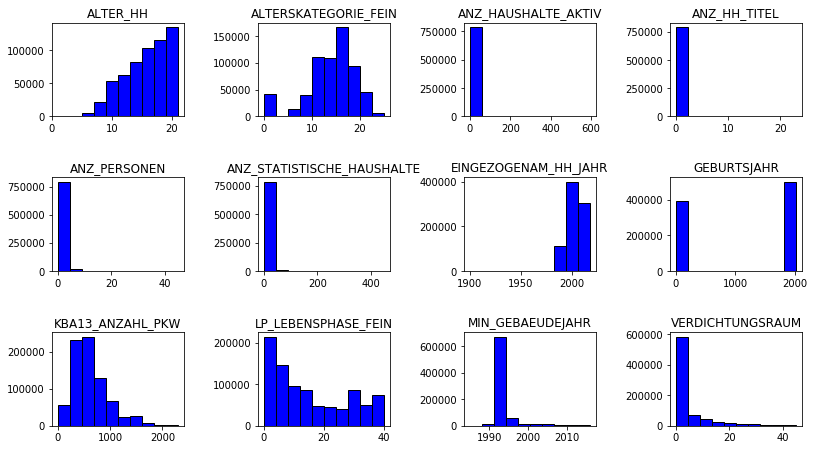

In [162]:
distribution_graphs(big_cat_columns)

In [ ]:
#convert numeraical data columns to categories

numerical_columns = ['ANZ_HAUSHALTE_AKTIV', ]

azdias['ANZ_HAUSHALTE_AKTIV'].value_counts()